# Meeting at a Central Point

**Goal**: Help three caterpillars to find a vertex, where they can meet the soonest.

Imagine three caterpillars sitting on vertices $v_1$, $v_2$, and $v_3$ of a connected graph $G = (V,E)$. The three caterpillars would like to meet at one of the vertices of the graph. All they can do is moving from one vertex to another via the edges of the graph, and they can only stop at vertices of the graph, but not on an edge. When traversing an edge, the three caterpillars travel at the same speed of one edge per hour. For an example, consider the graph below. The starting points of the caterpillars are marked in red.

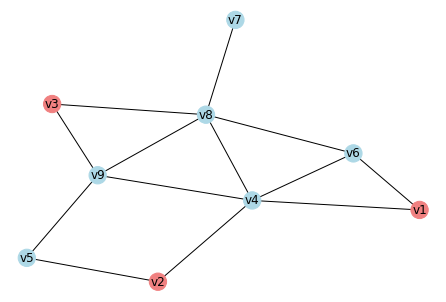

In [2]:
import networkx as nx

# Create graph G
G = nx.Graph()
G.add_nodes_from(['v1','v2','v3','v4','v5','v6','v7','v8','v9'])
G.add_edges_from([('v1','v4'), ('v1','v6'),
                  ('v2','v5'), ('v2','v4'),
                  ('v3','v8'), ('v3','v9'),
                  ('v4','v6'), ('v4','v8'), ('v4','v9'),
                  ('v5','v9'),
                  ('v6','v8'),
                  ('v7','v8'),
                  ('v8','v9')])

# Plot graph G
%matplotlib inline
nx.draw(G, with_labels=True, node_color = 3*['lightcoral']+6*['lightblue'])

To meet at vertex $v_5$, the caterpillar from vertex $v_1$ could travel to $v_5$ via the vertices $v_4$ and $v_2$ in three hours (and there is no faster option), and the caterpillars from $v_2$ and $v_3$ could be there in one and two hours, respectively. Thus, an earliest meeting at $v_5$ could take place three hours after the caterpillars start moving.

**Your task:** The caterpillars want to know at a vertex where they can meet the soonest. Implement an algorithm that determines such a vertex.

*Hint:* You may use the implementation of Breadth first search `nx.bfs_edges(G, source)`.

In [3]:
# Write a function that computes the distances of all nodes from a source node
def distances(G, source):
    edges = list(nx.bfs_edges(G, source)) # apply breadth first search
    dist = {node:0 for node in list(G.nodes)} # initialize distances as zero
    for edge in edges:
        dist[edge[1]] = dist[edge[0]] + 1
    return dist

print(distances(G, 'v1'))

{'v1': 0, 'v2': 2, 'v3': 3, 'v4': 1, 'v5': 3, 'v6': 1, 'v7': 3, 'v8': 2, 'v9': 2}


In [4]:
# Write a function that computes the maximal time needed in order for all caterpillars to reach a vertex
def time_to_meeting(G, sources):
    time = {node:0 for node in list(G.nodes)} # initialize distances as zero
    dist = [distances(G, source) for source in sources]
    for node in list(G.nodes):
        time[node] = max([d[node] for d in dist])
    return time

print(time_to_meeting(G, ['v1','v2','v3']))

{'v1': 3, 'v2': 3, 'v3': 3, 'v4': 2, 'v5': 3, 'v6': 2, 'v7': 3, 'v8': 2, 'v9': 2}


In [5]:
# Apply your function to the graph G and get a possible meeting vertex
time = time_to_meeting(G, ['v1','v2','v3'])
print(f'A possible meeting point is the vertex {min(time, key=time.get)}.') 

A possible meeting point is the vertex v4.


**Optional task**: Analyze the running time of your algorithm in terms of $|V|$ and $|E|$ (the number of caterpillars, namely three, is assumed to be a constant). Can you achieve a complexity of $O(|V|+|E|)$?

**Solution:** Remember that BFS takes $O(|V|+|E|)$ time.

1. We apply BFS three times, which has again a complexity of $O(|V|+|E|)$.
2. We compute the maximum of three values $|V|$ times, which is of complexity $O(|V|)$.
3. We find a minimizing vertex by comparing $|V|$ values, which is again of complexity $O(|V|)$.

Hence, the complete procedure is of complexity $O(|V|+|E|)$.